#1.Data description

Dataset Overview
The balanced.csv dataset contains information used to determine the balance status of a scale based on various features. This dataset is often used for classification tasks to predict whether the scale is balanced, tilting to the left, or tilting to the right.

Data Source
The dataset can be found in the UCI Machine Learning Repository. Here is the link to the dataset: UCI Machine Learning Repository - Balance Scale Data Set: https://archive.ics.uci.edu/dataset/12/balance+scale


Features (Variables) and Target
The dataset includes the following features and target variable:

Class Name: This is the target variable. It indicates the balance status of the scale and has three possible values:

L (Left): The scale is tilting to the left.

B (Balanced): The scale is balanced.

R (Right): The scale is tilting to the right.

Left-Weight: This feature represents the weight on the left side of the scale. It can take integer values from 1 to 5.

Left-Distance: This feature represents the distance of the weight on the left side from the fulcrum. It can take integer values from 1 to 5.

Right-Weight: This feature represents the weight on the right side of the scale. It can take integer values from 1 to 5.

Right-Distance: This feature represents the distance of the weight on the right side from the fulcrum. It can take integer values from 1 to 5.

Description of Features and Target:

Class Name: The target variable that indicates the balance status of the scale. It helps in understanding whether the scale is balanced or which side it is tilting towards.

Left-Weight: Affects the balance of the scale. Higher weights on the left side increase the likelihood of the scale tilting to the left.

Left-Distance: Affects the leverage of the weight on the left side. Greater distances increase the torque, influencing the balance.

Right-Weight: Affects the balance of the scale. Higher weights on the right side increase the likelihood of the scale tilting to the right.

Right-Distance: Affects the leverage of the weight on the right side. Greater distances increase the torque, influencing the balance.

Task Type:

This dataset is used for classification. The goal is to classify the balance status of the scale into one of the three classes: L(Left), B(Balanced), or R(Right).


In [ ]:
import io
from google.colab import files
from sklearn import tree
import numpy as np
np.set_printoptions(formatter={'float_kind':"{:3.2f}".format})
from sklearn.model_selection import cross_val_score, KFold,train_test_split

from sklearn.metrics import accuracy_score


In [ ]:
uploaded = files.upload()

Saving balanced.csv to balanced.csv


In [ ]:
uploaded = io.BytesIO(uploaded['balanced.csv'])

In [ ]:
import pandas as pd
df = pd.read_csv(uploaded)
df.head()

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


##Section 2 Perform data cleaning and preprocessing


In [ ]:
df.isnull().sum()

,0
Class Name,0
Left-Weight,0
Left-Distance,0
Right-Weight,0
Right-Distance,0


There are no missing values

In [ ]:
df.dtypes

,0
Class Name,object
Left-Weight,int64
Left-Distance,int64
Right-Weight,int64
Right-Distance,int64


All the columns are numerical except Class Name and Class Name is ordinal. All of the columns are also their respected type such as the numeric and ordinal

There are no missing data

#Section 3: Perform preliminary data analysis

In [ ]:
df.shape

(625, 5)

There are 625 rows and 5 columns

In [ ]:
df.describe().count()

,0
Left-Weight,8
Left-Distance,8
Right-Weight,8
Right-Distance,8


Based on the findings all of the four variables have the same count of observations, suggesting there are no missing values in any of the columns.

#Section 4: Perform exploratory analysis by use of visualization

Scatter plots, bar graphs, pie charts, and density plots

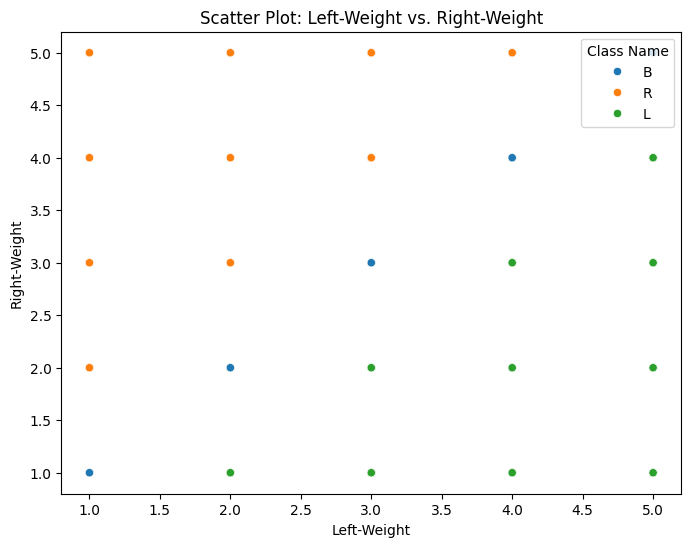

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Left-Weight vs. Right-Weight
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Left-Weight', y='Right-Weight', hue='Class Name', data=df)
plt.title('Scatter Plot: Left-Weight vs. Right-Weight')
plt.show()


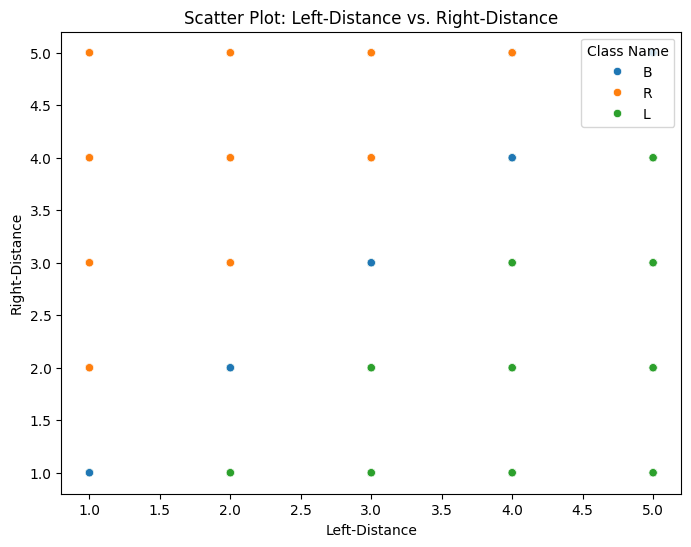

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Left-Weight vs. Right-Weight
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Left-Distance', y='Right-Distance', hue='Class Name', data=df)
plt.title('Scatter Plot: Left-Distance vs. Right-Distance')
plt.show()


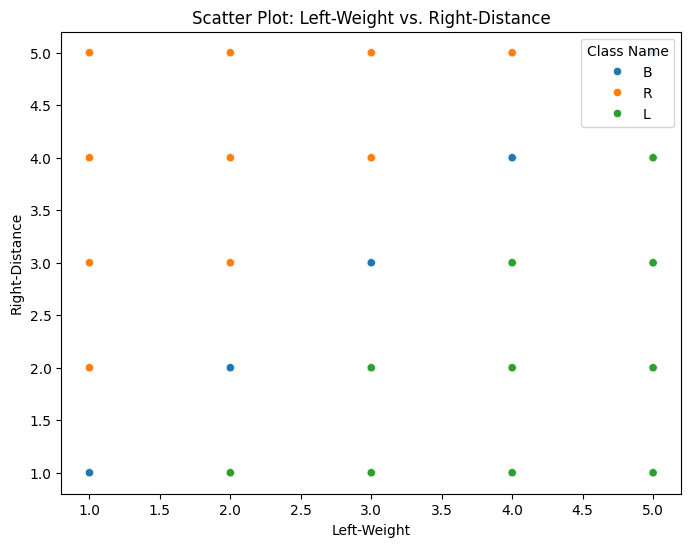

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Left-Weight vs. Right-Weight
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Left-Weight', y='Right-Distance', hue='Class Name', data=df)
plt.title('Scatter Plot: Left-Weight vs. Right-Distance')
plt.show()


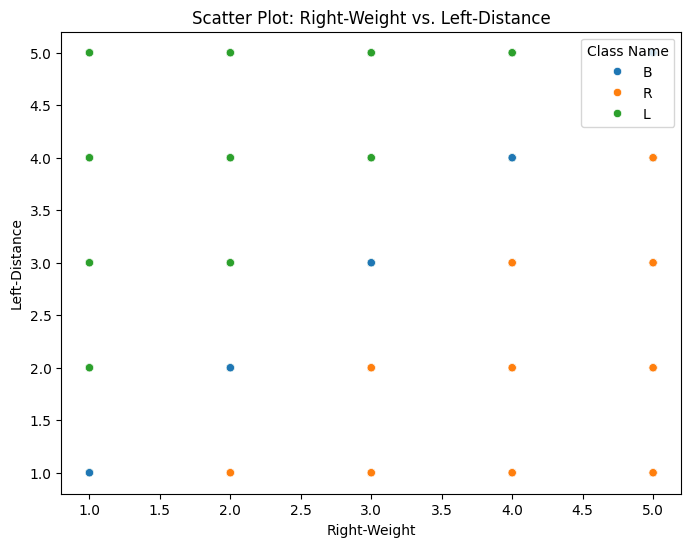

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Left-Weight vs. Right-Weight
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Right-Weight', y='Left-Distance', hue='Class Name', data=df)
plt.title('Scatter Plot: Right-Weight vs. Left-Distance')
plt.show()


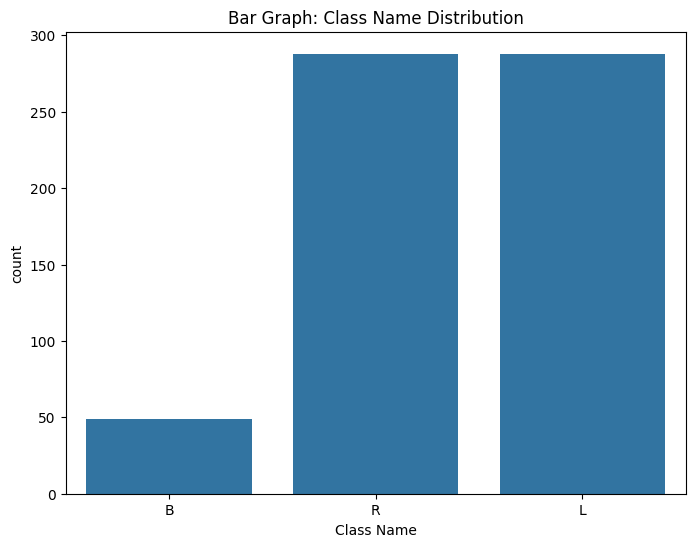

In [ ]:
# Bar graph: Class Name distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class Name', data=df)
plt.title('Bar Graph: Class Name Distribution')
plt.show()

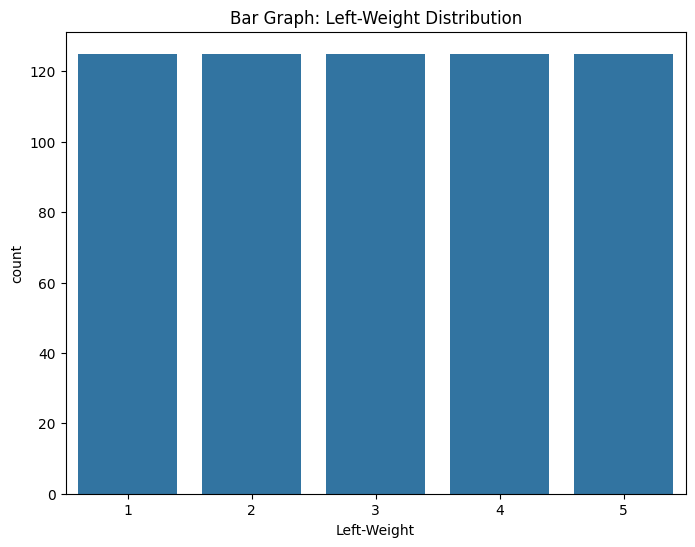

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Left-Weight', data=df)
plt.title('Bar Graph: Left-Weight Distribution')
plt.show()

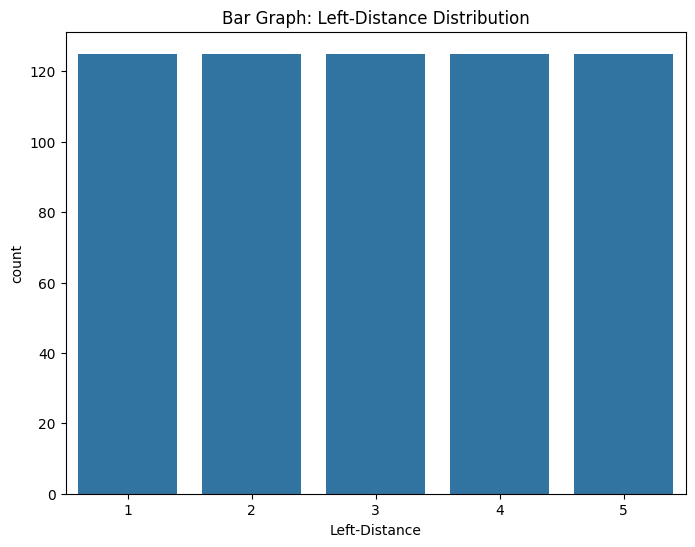

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Left-Distance', data=df)
plt.title('Bar Graph: Left-Distance Distribution')
plt.show()

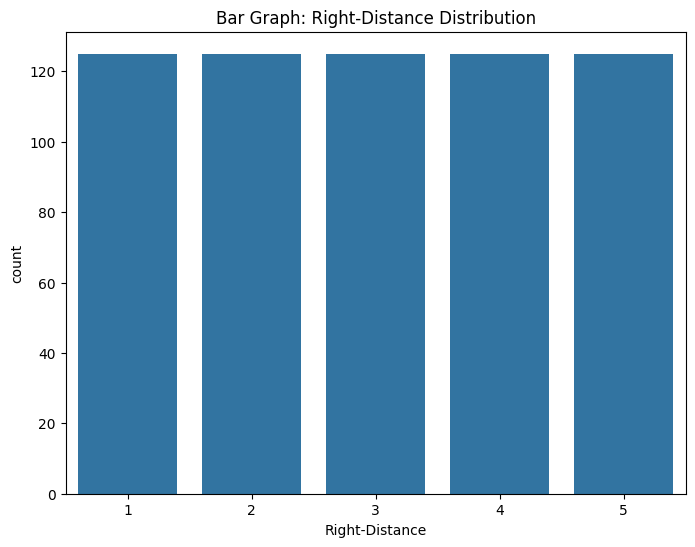

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Right-Distance', data=df)
plt.title('Bar Graph: Right-Distance Distribution')
plt.show()

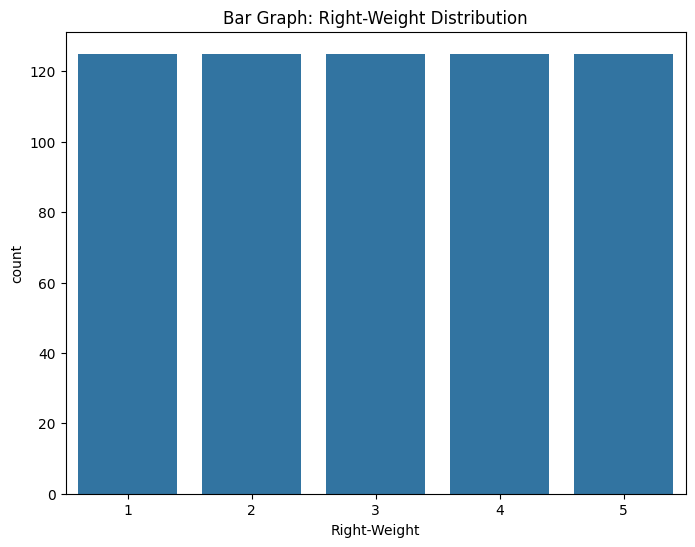

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Right-Weight', data=df)
plt.title('Bar Graph: Right-Weight Distribution')
plt.show()

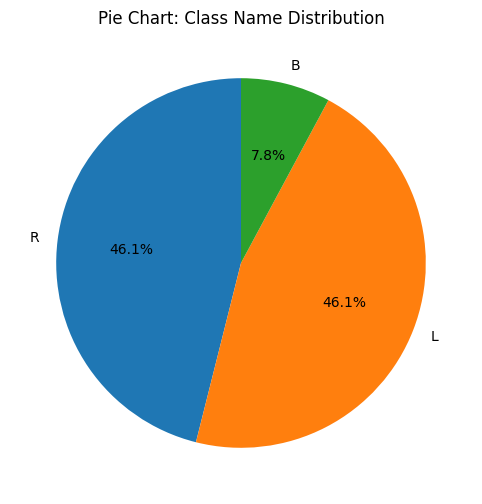

In [ ]:
# Pie chart: Class Name distribution (percentage)
class_counts = df['Class Name'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart: Class Name Distribution')
plt.show()

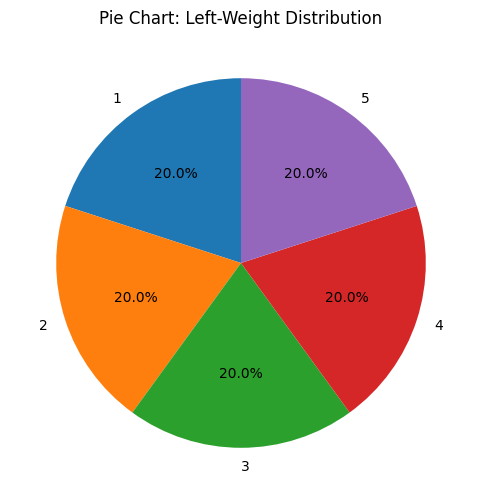

In [ ]:
# Pie chart: Class Name distribution (percentage)
class_counts = df['Left-Weight'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart: Left-Weight Distribution')
plt.show()

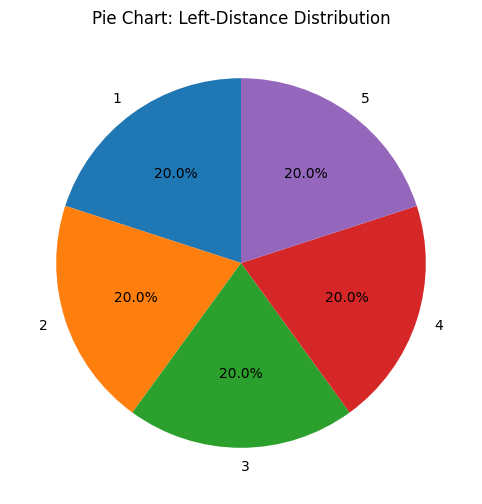

In [ ]:
# Pie chart: Class Name distribution (percentage)
class_counts = df['Left-Distance'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart: Left-Distance Distribution')
plt.show()

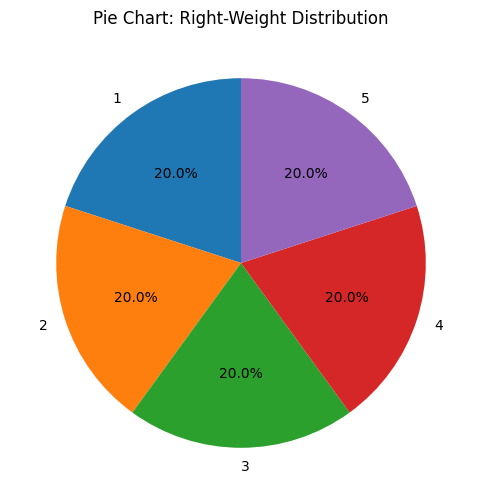

In [ ]:
# Pie chart: Class Name distribution (percentage)
class_counts = df['Right-Weight'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart: Right-Weight Distribution')
plt.show()

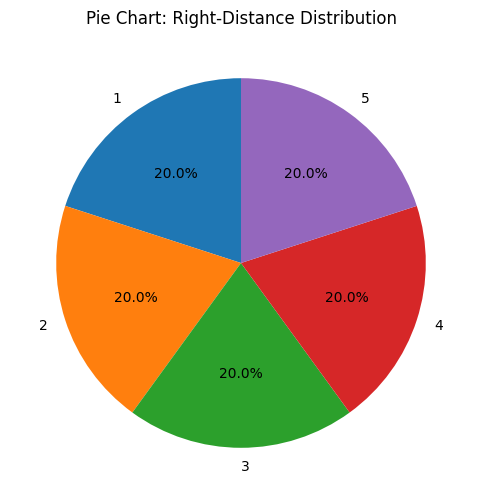

In [ ]:
# Pie chart: Class Name distribution (percentage)
class_counts = df['Right-Distance'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart: Right-Distance Distribution')
plt.show()

<ipython-input-61-49fc2e5e0231>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Left-Weight'], shade=True)


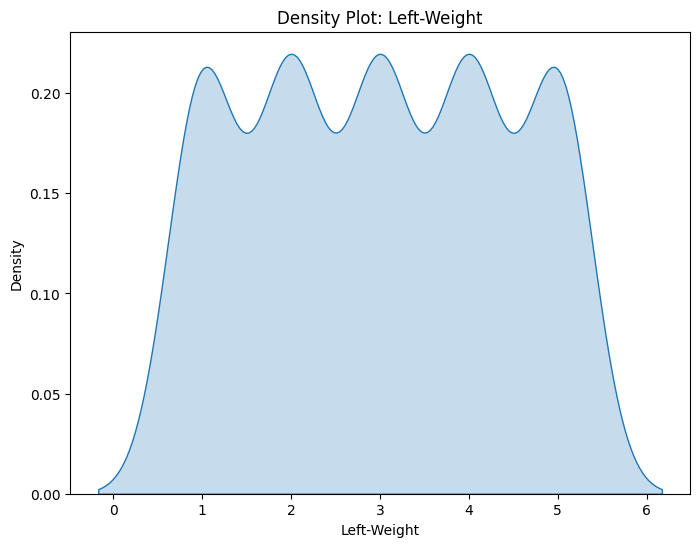

In [ ]:
# Density plot: Left-Weight
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Left-Weight'], shade=True)
plt.title('Density Plot: Left-Weight')
plt.show()

<ipython-input-62-c532f4346f54>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Right-Weight'], shade=True)


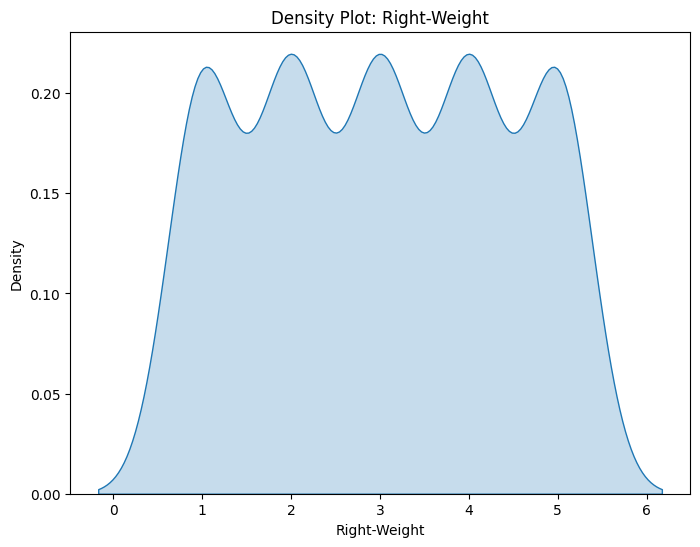

In [ ]:
# Density plot: Right-Weight
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Right-Weight'], shade=True)
plt.title('Density Plot: Right-Weight')
plt.show()

<ipython-input-63-37aa19478fab>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Left-Distance'], shade=True)


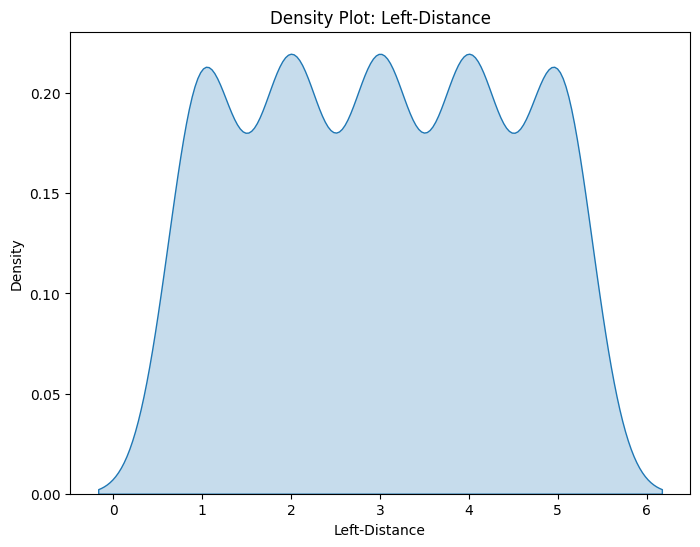

In [ ]:
# Density plot: Left-Distance
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Left-Distance'], shade=True)
plt.title('Density Plot: Left-Distance')
plt.show()

<ipython-input-64-f6e8814f4ebb>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Right-Distance'], shade=True)


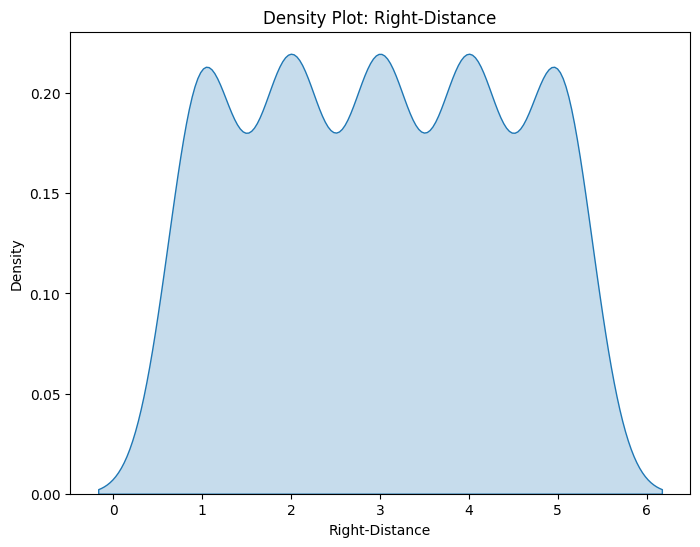

In [ ]:
# Density plot: Right-Distance
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Right-Distance'], shade=True)
plt.title('Density Plot: Right-Distance')
plt.show()

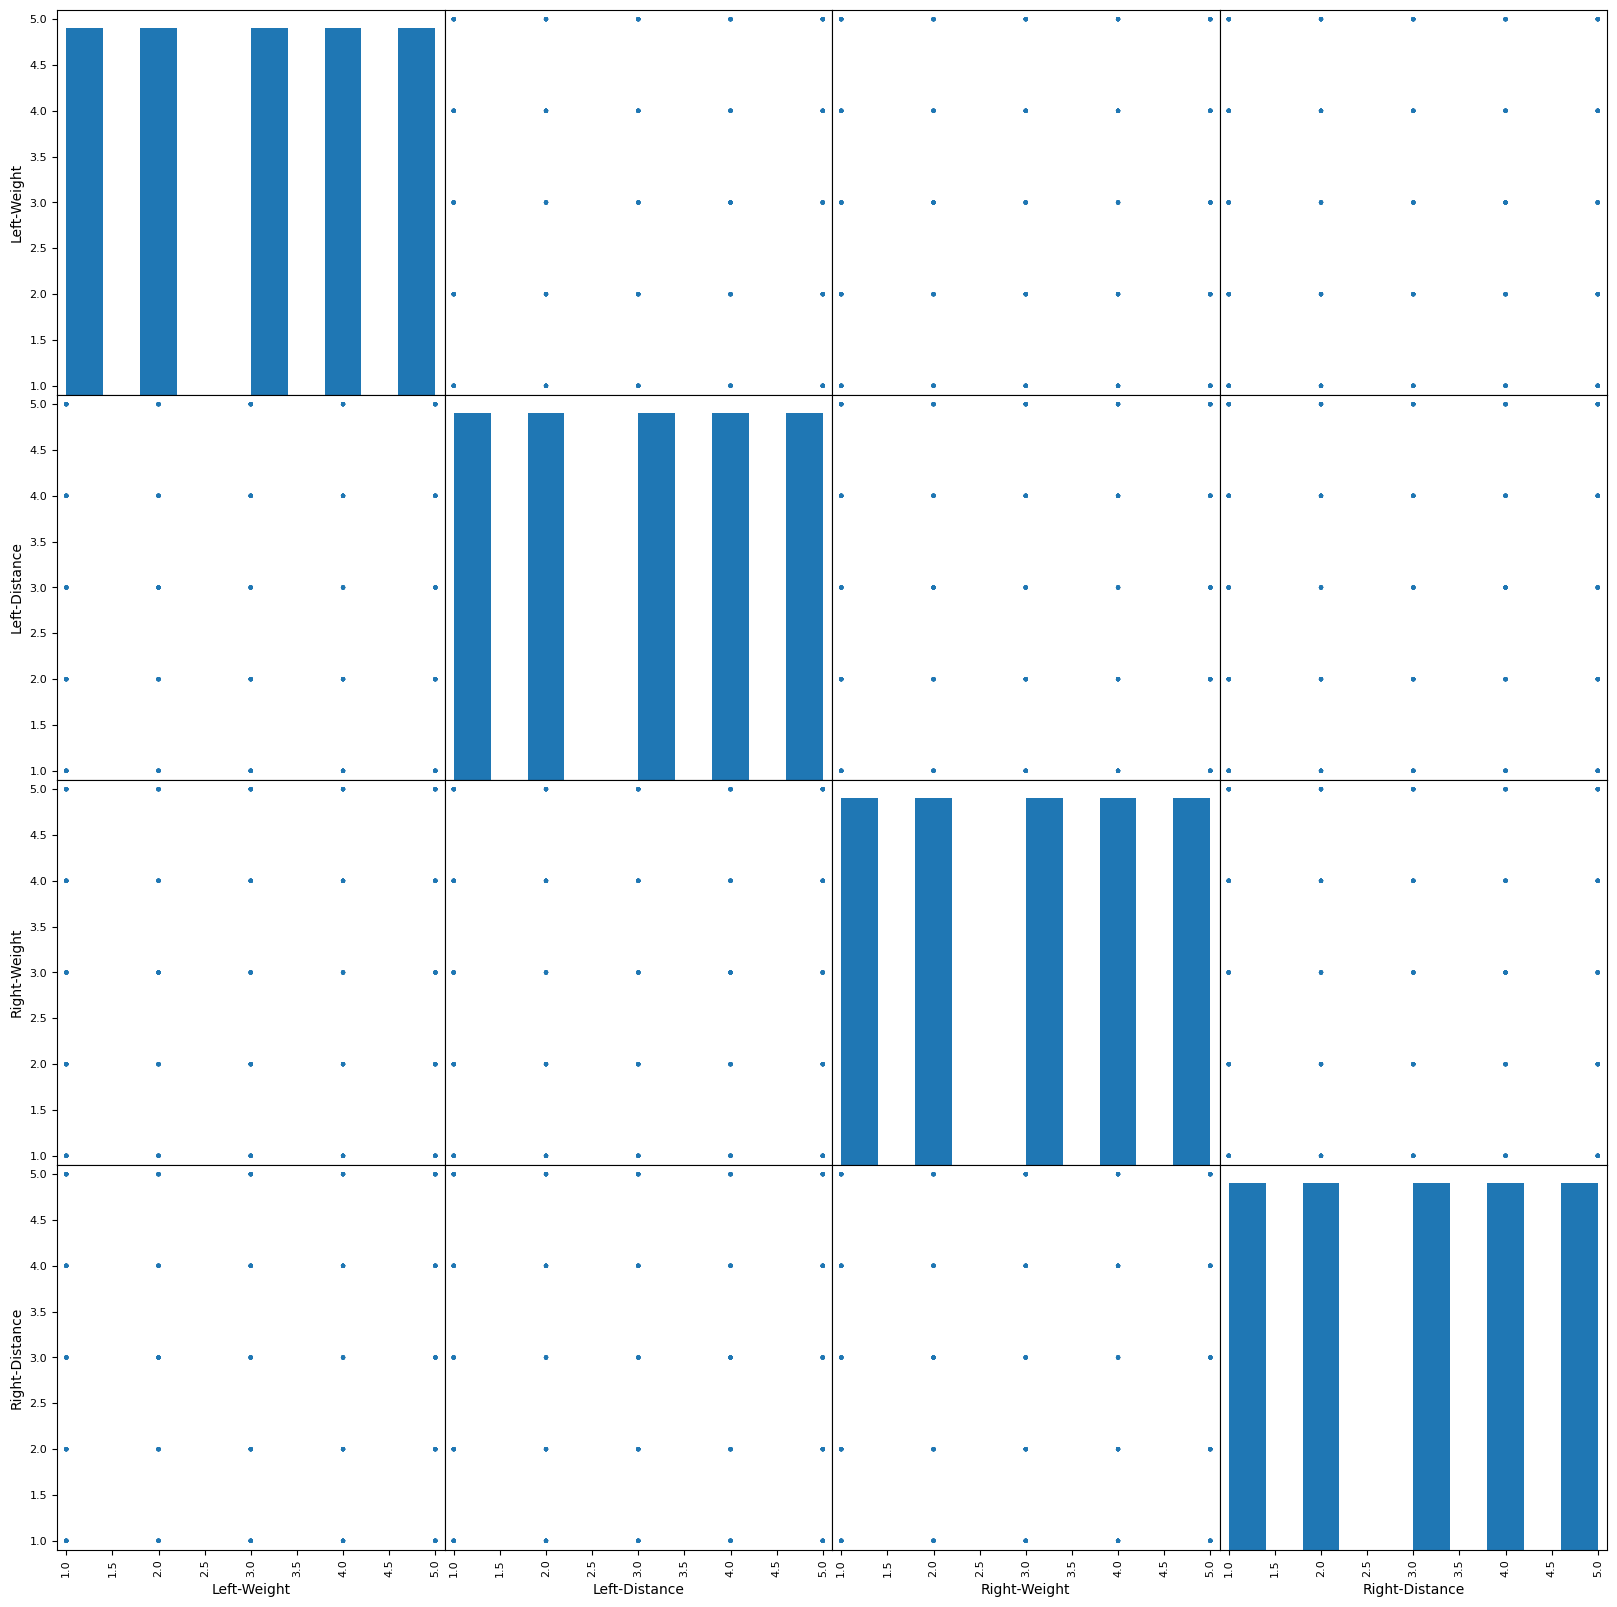

In [ ]:
null = pd.plotting.scatter_matrix(df, figsize=[20,20])

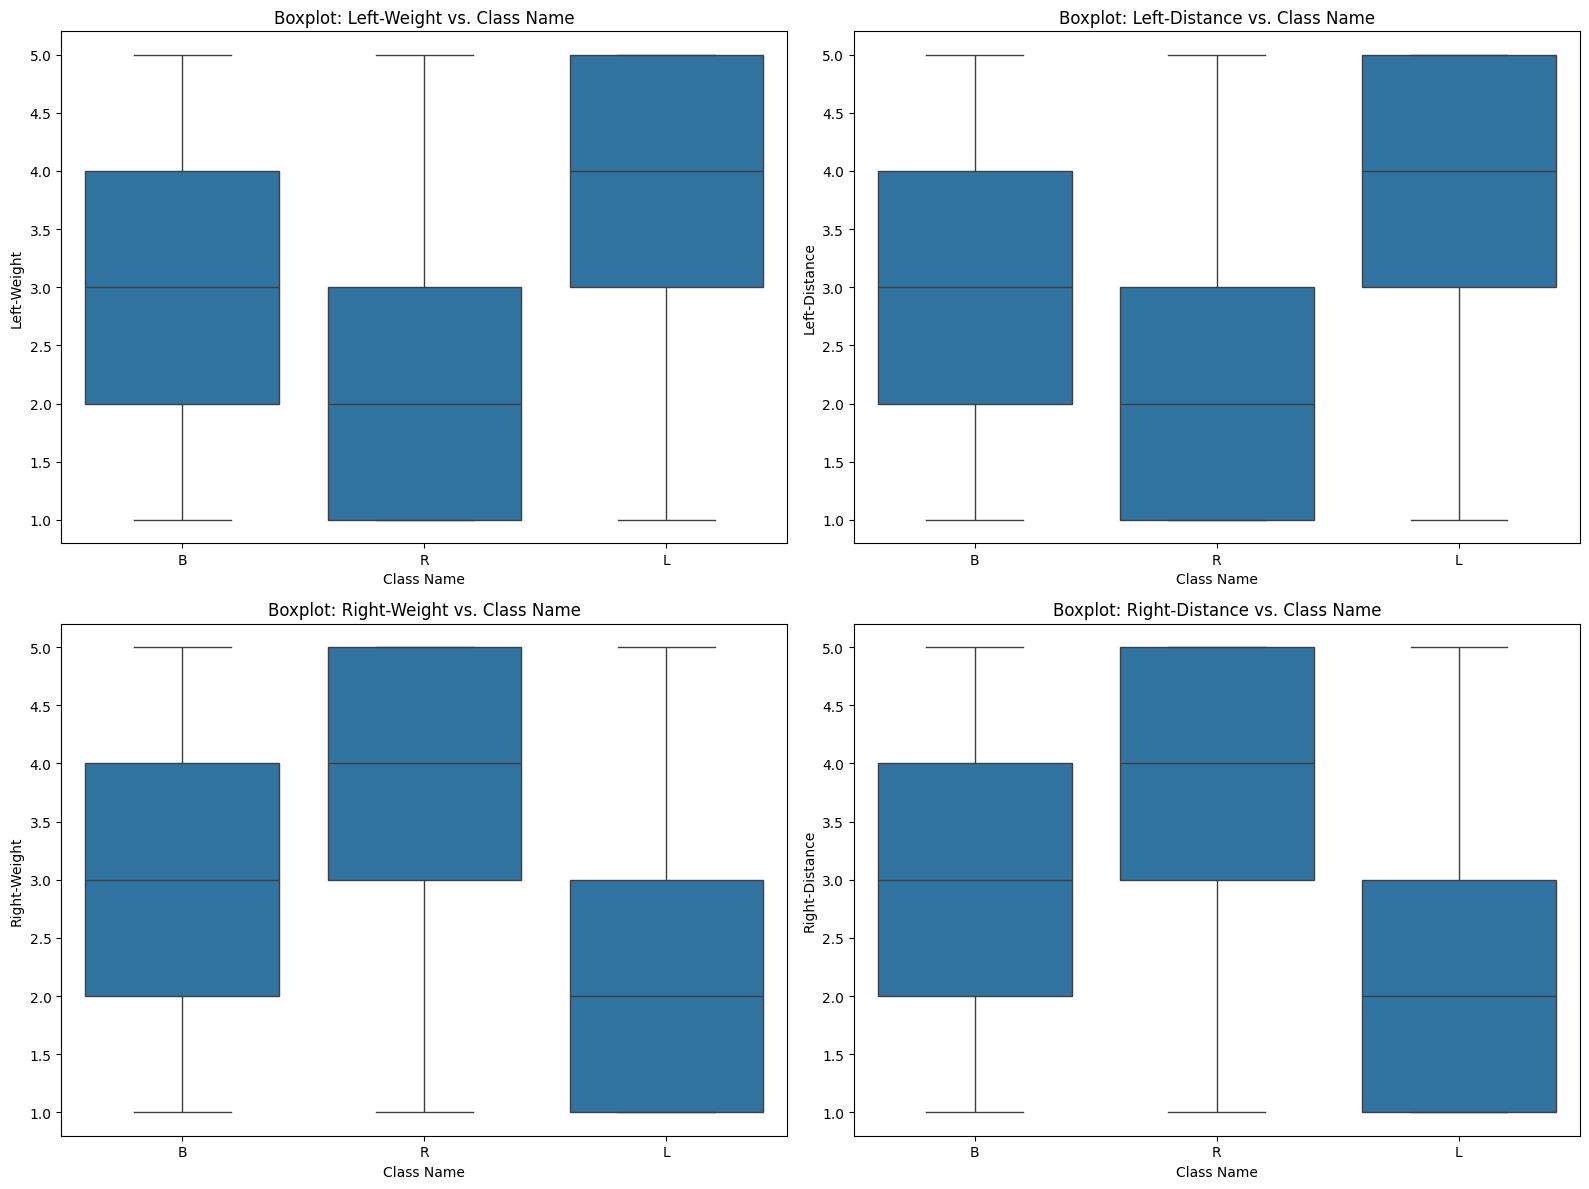

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creates a 2x2 grid for the boxplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Boxplot: Left-Weight vs. Class Name
sns.boxplot(ax=axes[0, 0], data=df, x='Class Name', y='Left-Weight')
axes[0, 0].set_title('Boxplot: Left-Weight vs. Class Name')

# Boxplot: Left-Distance vs. Class Name
sns.boxplot(ax=axes[0, 1], data=df, x='Class Name', y='Left-Distance')
axes[0, 1].set_title('Boxplot: Left-Distance vs. Class Name')

# Boxplot: Right-Weight vs. Class Name
sns.boxplot(ax=axes[1, 0], data=df, x='Class Name', y='Right-Weight')
axes[1, 0].set_title('Boxplot: Right-Weight vs. Class Name')

# Boxplot: Right-Distance vs. Class Name
sns.boxplot(ax=axes[1, 1], data=df, x='Class Name', y='Right-Distance')
axes[1, 1].set_title('Boxplot: Right-Distance vs. Class Name')

plt.tight_layout()
plt.show()


Question: Is my data balanced?

Answer: My data isn't balanced when you look at the bar graph and pie chart of the class name distribution which is my target variable.

Discuss my findings: The scatter plot matrix offers a  representation of the relationships between all pairs of numerical features, helping to identify potential correlations or patterns. In this case, the scatter plot reveals that there are no strong or clear linear relationships between the variables, suggesting that relying solely on these features for prediction may not be straightforward. This indicates that building a highly accurate prediction model could be challenging without additional features.

The boxplot matrix, provides a breakdown of how each numerical feature—such as 'Left-Weight', 'Left-Distance', 'Right-Weight', and 'Right-Distance'—varies across different categories in the 'Class Name' variable (e.g., Left, Balanced, Right). By examining the distribution of each feature by class, it's possible to observe that for certain features, such as 'Left-Weight' and 'Right-Weight', the medians and interquartile ranges differ significantly across classes. For instance, the 'Left' class tends to have a higher median for 'Left-Weight', while the 'Right' class tends to have a higher median for 'Right-Weight'. These distinctions suggest that these features may help differentiate between classes, although some overlap exists in the distributions. This overlap could indicate that using these features alone may not be enough to achieve perfect classification, particularly when outliers are present in the data.

#Unrestriced high complexity model

In [ ]:
features = df.drop('Class Name', axis=1)

In [ ]:
target = df['Class Name']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
#From the model selection library import decision tree
from sklearn import tree

#models is a decision tree with entropy as a parameter
dtree = tree.DecisionTreeClassifier(criterion='entropy')
#Train the model with training feature matrix and it's corresponding target labels
dtree.fit(features,target)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth = None, random_state=42)
dtree.fit(X_train, y_train)
pred_train_high = dtree.predict(X_train)
pred_test_high = dtree.predict(X_test)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, pred_train_high)))
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, pred_test_high)))

Train Accuracy: 1.00
Test Accuracy: 0.74


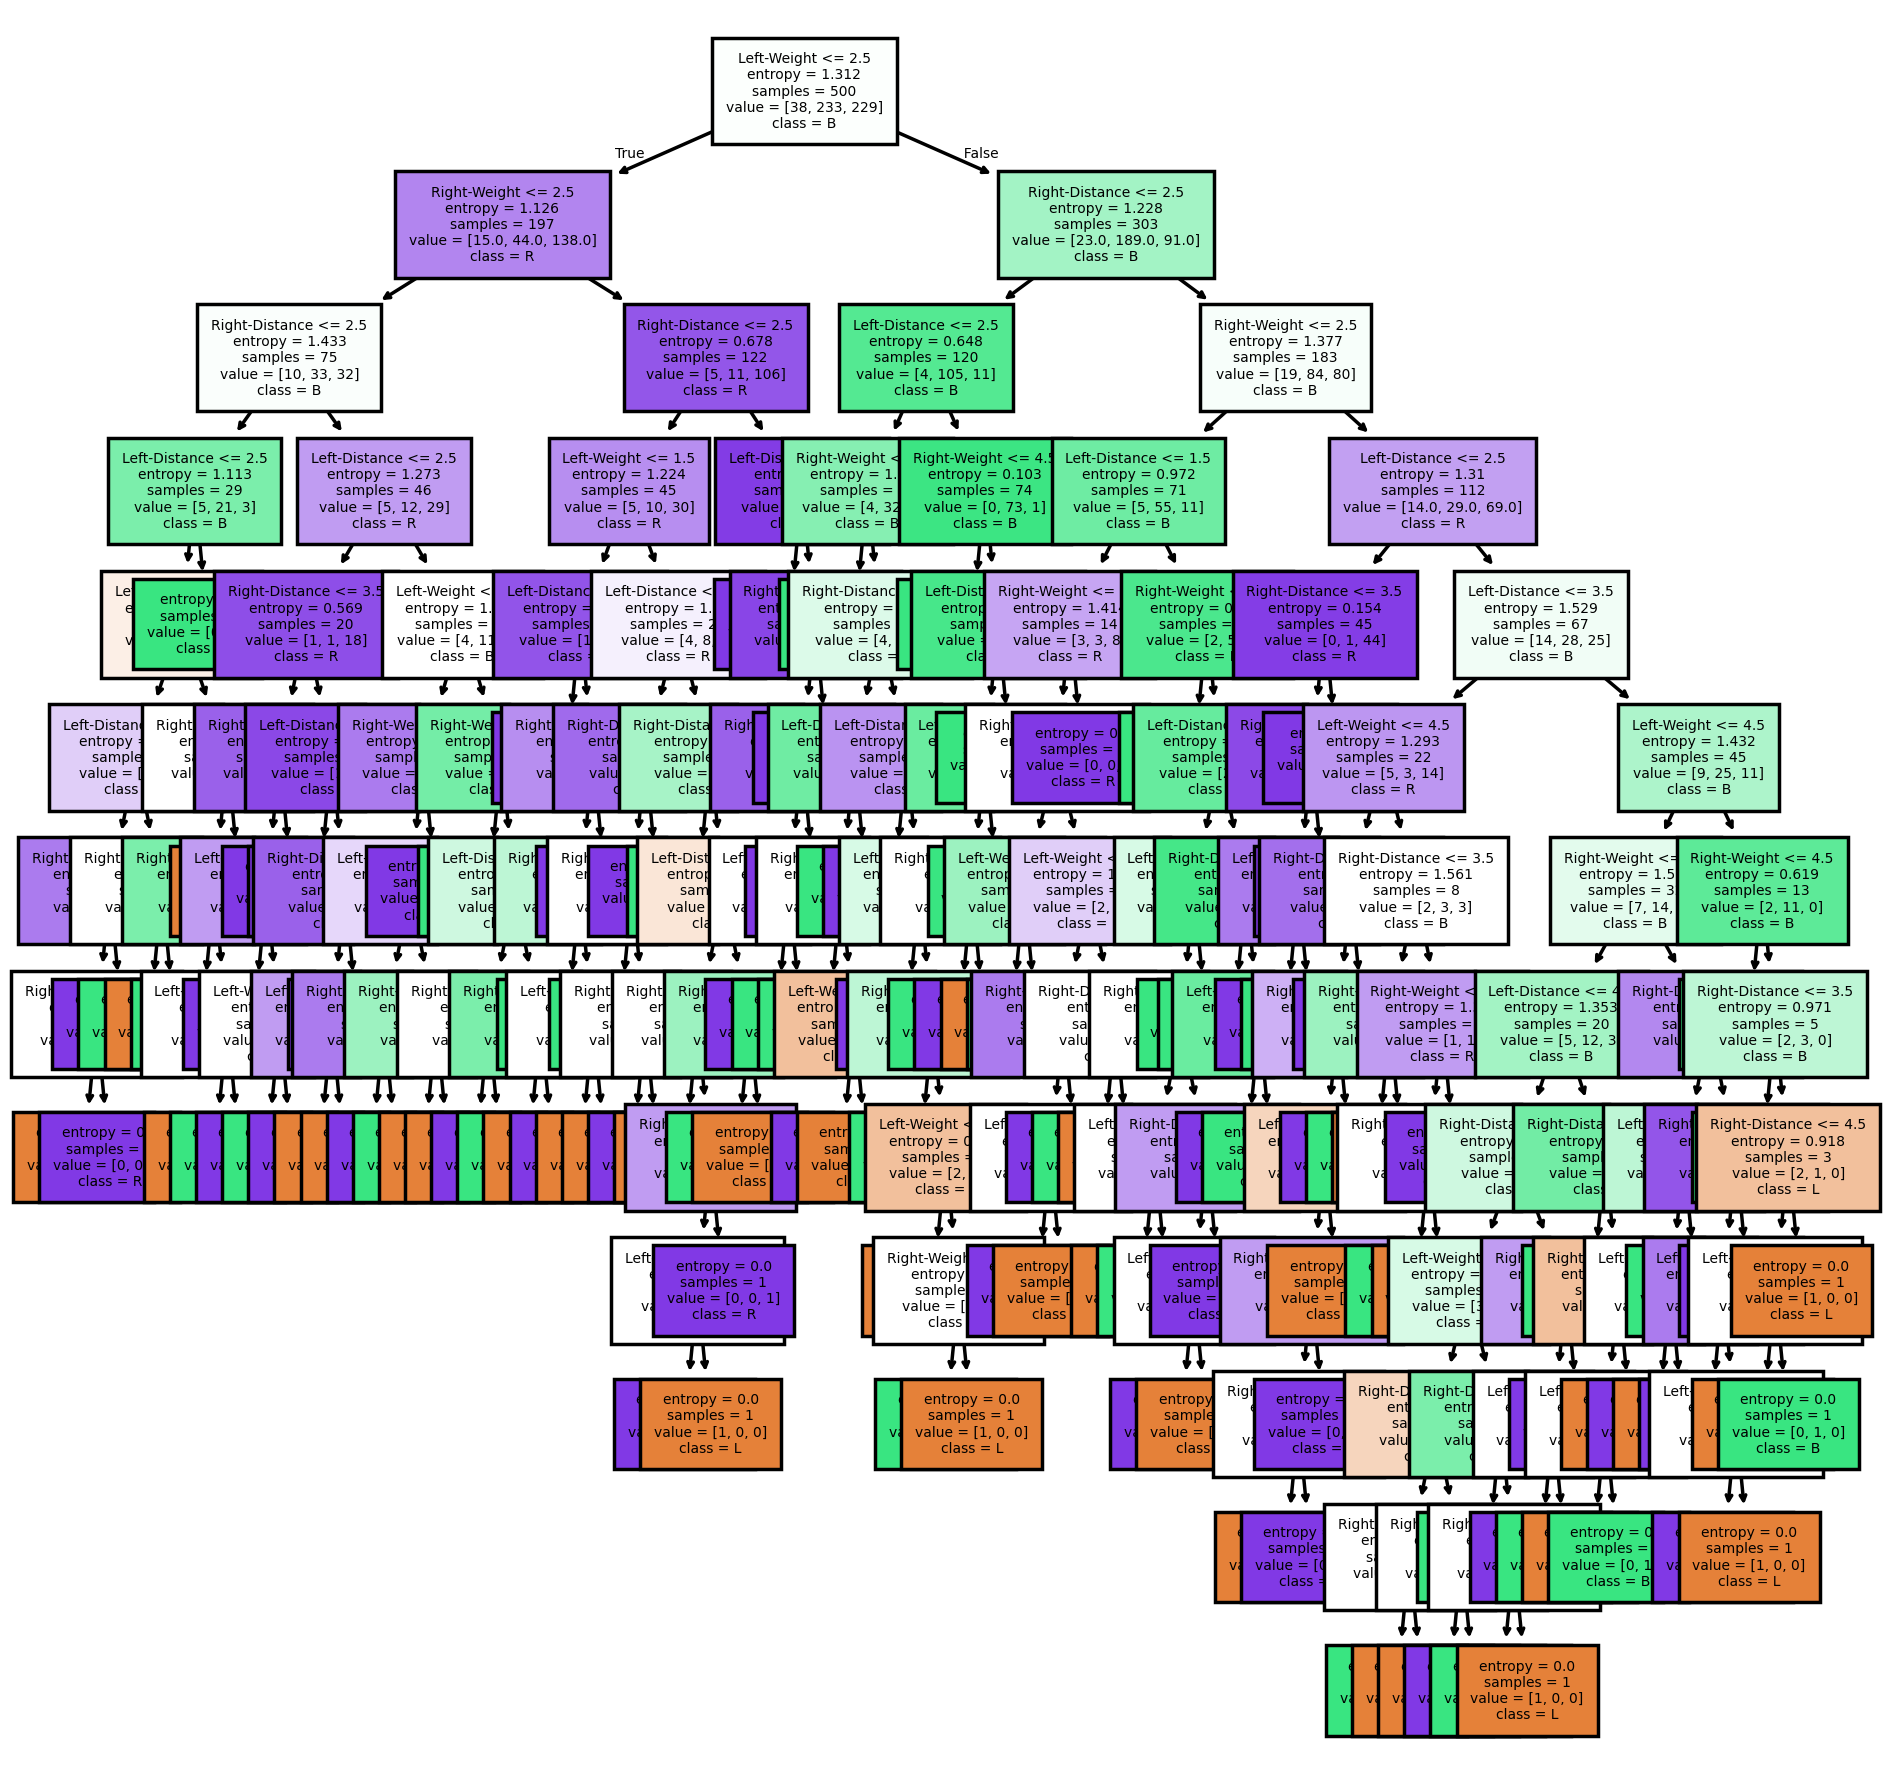

[Ellipsis]

In [ ]:
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(9, 9), dpi=250)
plot_tree(dtree, fontsize=4, filled=True,
               max_depth=None,
               feature_names= features.columns,
               #class_names= list(target.unique()))
               class_names = ['L', 'B', 'R'])
plt.show()
[...]

#Medium Complexity Model

In [ ]:
dtree_med = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dtree_med.fit(X_train, y_train)
pred_train_med = dtree_med.predict(X_train)
pred_test_med = dtree_med.predict(X_test)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, pred_train_med)))
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, pred_test_med)))

Train Accuracy: 0.85
Test Accuracy: 0.78


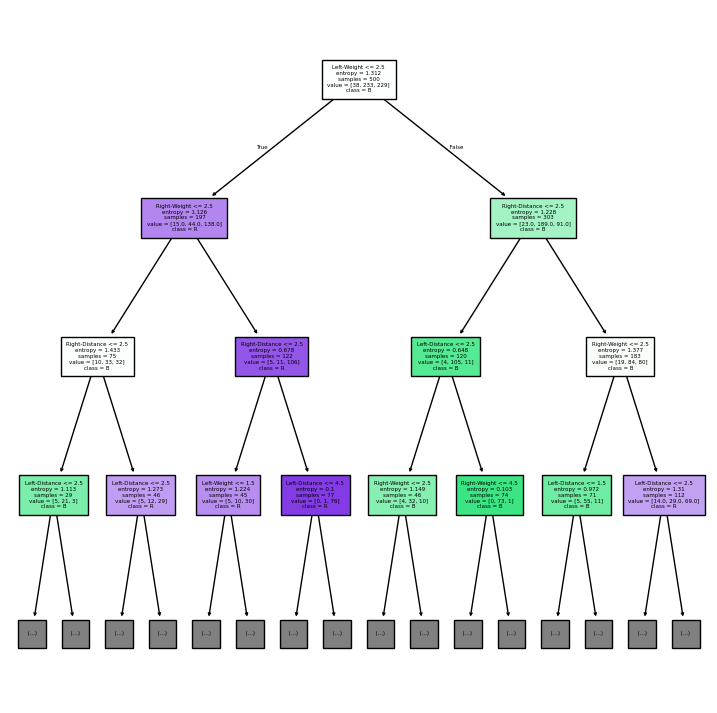

[Ellipsis]

In [ ]:
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(9, 9), dpi=100)
plot_tree(dtree_med, fontsize=4, filled=True,
               max_depth=3,
               feature_names= features.columns,
               #class_names= list(target.unique()))
               class_names = ['L', 'B', 'R'])
plt.show()
[...]

#Low complexity model

In [ ]:
# set up the tree model object
dtree_low = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)

# fit the model on the training set of data
dtree_low.fit(X_train, y_train)

# Prediction using Training data
pred_train_low = dtree_low.predict(X_train)
# Prediction using Testing data
pred_test_low = dtree_low.predict(X_test)

# Train results: evaluate the model on the training set of data
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, pred_train_low)))

# Test results: evaluate the model on the testing set of data
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, pred_test_low)))

Train Accuracy: 0.65
Test Accuracy: 0.56


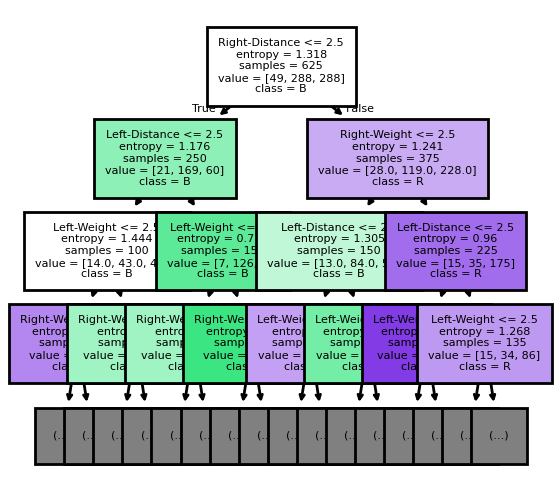

[Ellipsis]

In [ ]:
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(3, 3), dpi=200)
plot_tree(dtree, fontsize=4, filled=True,
               max_depth=3,
               feature_names= features.columns,
               #class_names= list(target.unique()))
               class_names = ['L', 'B', 'R'])
plt.show()
[...]

Question: Discuss how the low complexity model is underfitting and why?

Answer: The low complexity model is underfitting because the max depth = 1 is highly restrictive and the model can only make one split, which divides the data into just two regions. This is insufficient for the dataset, which involves more complex relationships between features, such as weight and distance, to determine balance conditions (Left, Right, Balanced). The model is too simple to account for these relationships, leading to poor classification.

Question: How many comparisons are being made by the low complexity model?

Answer: There are 14 comparisons being made in the low complexity model

Question: What decisions can be made by the low complexity model?

Answer: Decisions that can be made my the low complexity model are if the 'Right-Weight' <= 2.5, then the scale is likely Left, if the 'Right-Weight' > 2,5, the scaled is either Balanced or right.

#Questions about the models

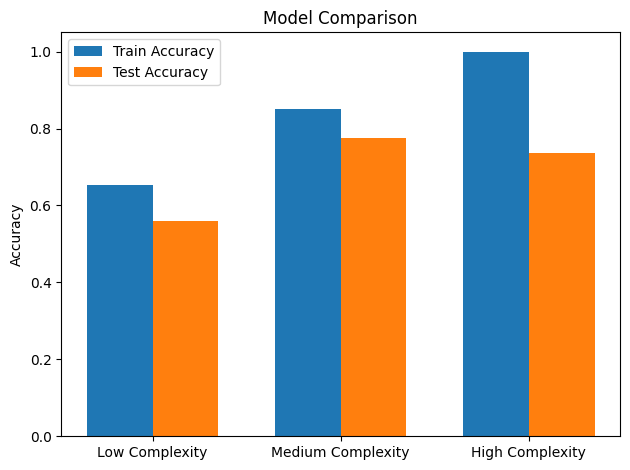

In [ ]:
# Function to train and evaluate a model
def evaluate_model(max_depth):
  dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
  dtree.fit(X_train, y_train)
  pred_train = dtree.predict(X_train)
  pred_test = dtree.predict(X_test)
  train_accuracy = accuracy_score(y_train, pred_train)
  test_accuracy = accuracy_score(y_test, pred_test)
  return train_accuracy, test_accuracy, dtree

# Low complexity model
train_acc_low, test_acc_low, dtree_low = evaluate_model(1)

# Medium complexity model
train_acc_med, test_acc_med, dtree_med = evaluate_model(5)

# High complexity model
train_acc_high, test_acc_high, dtree_high = evaluate_model(None)

# Comparing the models graphically
models = ['Low Complexity', 'Medium Complexity', 'High Complexity']
train_accuracies = [train_acc_low, train_acc_med, train_acc_high]
test_accuracies = [test_acc_low, test_acc_med, test_acc_high]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Train Accuracy')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()


Question: Discuss why one of the models is overfitting

Answer:  The high complexity decision tree model, with `max_depth=None`, is unrestricted in its growth, allowing it to perfectly classify the training data. This results in overfitting, where the model memorizes the data rather than learning general patterns. While this leads to high accuracy on the training set, it also captures noise and outliers that don't represent broader data trends. The model becomes overly complex and too tailored to the training data, reducing its ability to generalize to new, unseen data.

Question: What can you do to prevent overfitting?

Answer: I can limit the depth of the decision tree which will prevent the model from becoming overly complex.

#Perform a Model search to find the best medium-complexity model

In [ ]:
# Grid search with cross-validation for wisconsin breast cancer dataset
from sklearn.model_selection import GridSearchCV

# do the 5-fold cross validation and shuffle the data
cv = KFold(n_splits=5,  shuffle = True)

# setting up grid search
model = tree.DecisionTreeClassifier()
param_grid = {
    'max_depth': list(range(1,11)), # search 1..10
    'criterion': ['entropy', 'gini']
    }
grid = GridSearchCV(model, param_grid, cv=5)

# performing grid search
grid.fit(X_train, y_train)

# print out what we found
print("Best parameters: {}".format(grid.best_params_))

Best parameters: {'criterion': 'entropy', 'max_depth': 7}


Question: What is the optimal classifier and the best sets of hyper-parameters for the model?

Answer: The optimal classifier is DecisionTreeClassifier
        
        The best sets of hyper-parameters are criterion = entropy and max depth

In [ ]:
print("Cross-validation scores of the best model:", grid.best_score_)

Cross-validation scores of the best model: 0.79


Question: Discuss why you have performed cross-validation.
What are the cross-validation scores of the best model?

Answer: I performed cross-validation to evaluate the performance of the model and find the best hyperparameters, to prevent overfitting, and to find the optimal classifier.

The cross validation scores of the best model is 0.79

In [ ]:
print("Mean Test Accuracy of the Best Model: {:.3f}".format(grid.best_score_))

Mean Test Accuracy of the Best Model: 0.790


Question: What is the mean accuracy of the best model?

Answer: The mean accuracy of the best model is 0.790

Question: Which of the model is the best? Low complexity, medium complexity, or the high complexity model?

Answer: The medium complexity model provides a good balance between capturing important patterns in the data and avoiding overfitting.  It has a `max_depth` of 5, which is enough to learn some meaningful relationships without being overly complex. This model is likely to have the best generalization ability, performing well on both training and test data.

The medium complexity model is the best choice because it balances model complexity and accuracy, leading to the best performance on unseen data, which is crucial in real-world applications.

#Build a model called ten_percent_worse_model

In [ ]:
ten_percent_worse_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

ten_percent_worse_model.fit(X_train, y_train)

pred_train_ten = ten_percent_worse_model.predict(X_train)
pred_test_ten = ten_percent_worse_model.predict(X_test)

print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, pred_train_ten)))
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, pred_test_ten)))


Train Accuracy: 0.77
Test Accuracy: 0.68


The lowest closest I was able to get to %10 worse was 0.68 which is about 6%. The nearest number was 0.55 which is 19% but 0.68 is closer to 0.74.

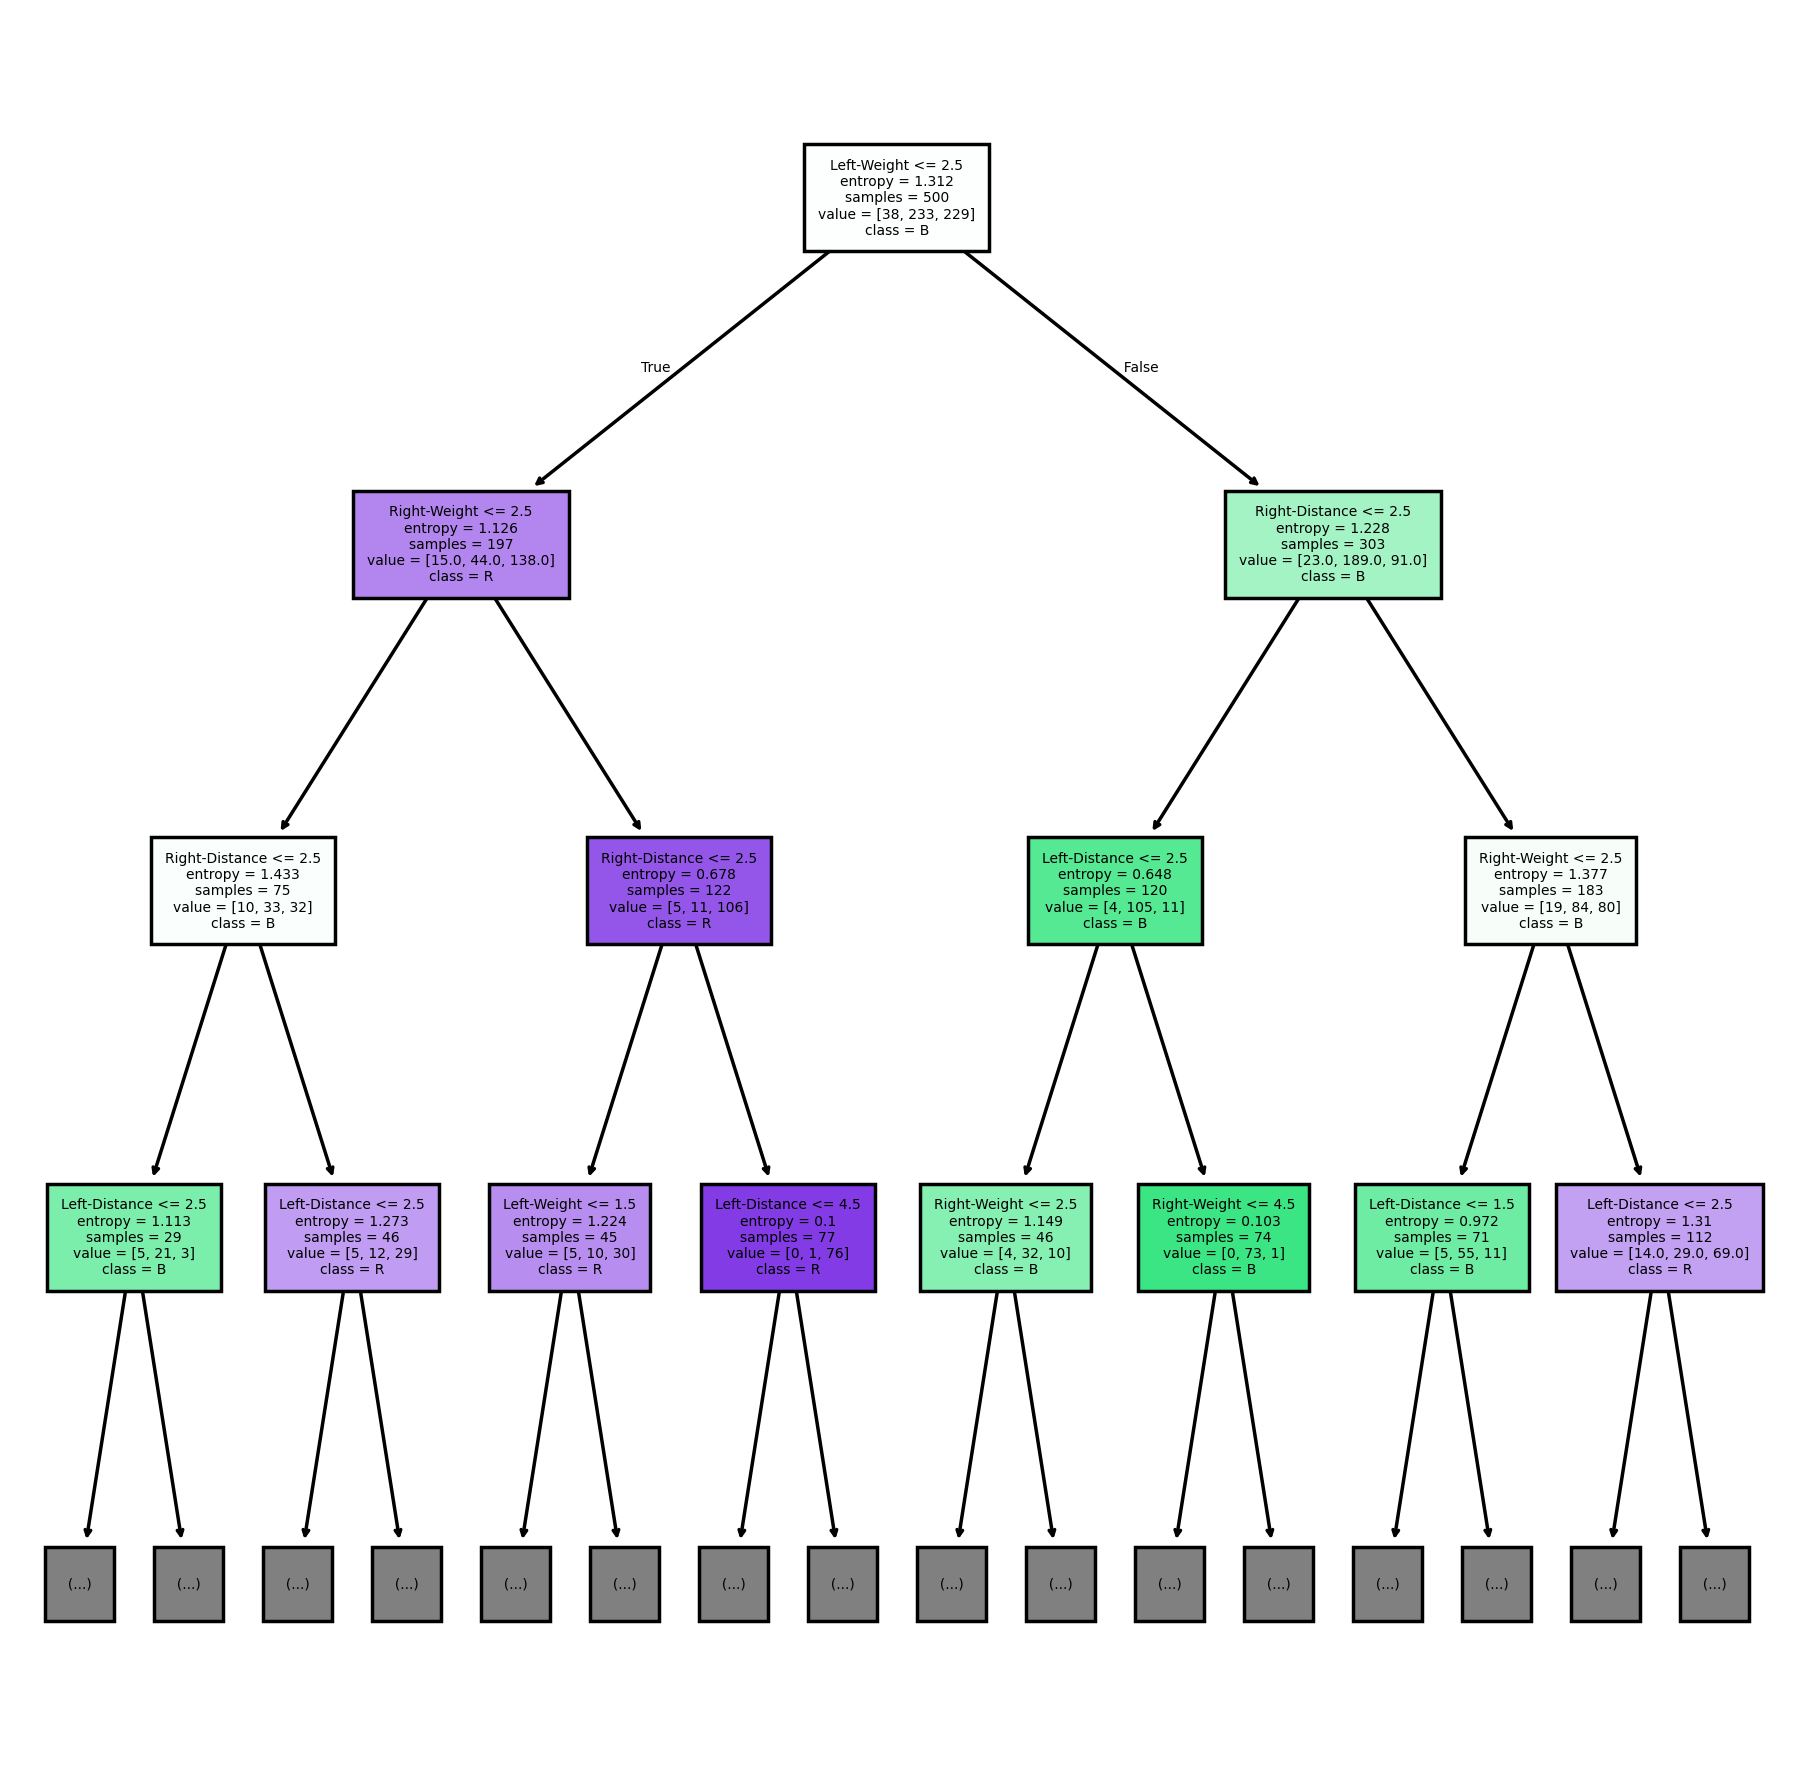

[Ellipsis]

In [ ]:
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(9, 9), dpi=250)
plot_tree(dtree, fontsize=4, filled=True,
               max_depth=3,
               feature_names= features.columns,
               #class_names= list(target.unique()))
               class_names = ['L', 'B', 'R'])
plt.show()
[...]

Question: Provide a brief interpretation of the second model.

Does it provide any deeper insights or patterns?

Answer: The maximum depth of 3 means the tree has a limited number of splits, which can affect its ability to learn complex relationships and it's expected to have lower accuracy than the optimal model (around 10% worse).

The 10 percent worse model helps provide a better insight of which features are more important and help us understand the complexity of the relationship between the variables and the target.

#Perform Model Evaluation on the medium complexity model and ten_percent_worse_model

In [ ]:
# predicting
pred_test_med = dtree_med.predict(X_test)

from sklearn.metrics import accuracy_score
# accuracy of optimal classifier
print("Accuracy of Medium Complexity model: {:3.2f}".format(accuracy_score(y_test, pred_test_med)))

Accuracy of Medium Complexity model: 0.78


In [ ]:
# predicting
pred_test_ten = ten_percent_worse_model.predict(X_test)

from sklearn.metrics import accuracy_score
# accuracy of optimal classifier
print("Accuracy of Ten Percent Worse  model: {:3.2f}".format(accuracy_score(y_test, pred_test_ten)))

Accuracy of Ten Percent Worse  model: 0.68


In [ ]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_med = balanced_accuracy_score(y_test, pred_test_med)
print("Balanced Accuracy of Medium Complexity Model: {:3.2f}".format(balanced_accuracy_med))

Balanced Accuracy of Medium Complexity Model: 0.57


In [ ]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_ten = balanced_accuracy_score(y_test, pred_test_ten)
print("Balanced Accuracy of Ten Percent Worse Complexity Model: {:3.2f}".format(balanced_accuracy_ten))

Balanced Accuracy of Ten Percent Worse Complexity Model: 0.50


In [ ]:
 #Import accuracy score and balanced accuracy score from model metrics package
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, balanced_accuracy_score

def model_metrics(y_true, y_predict):
  accuracy= accuracy_score(y_true, y_predict)
  precision=precision_score(y_true, y_predict, average='micro')
  recall=recall_score(y_true, y_predict, average='micro')
  f1=f1_score(y_true, y_predict, average='micro')
  balanced_accuracy=balanced_accuracy_score(y_true, y_predict)
  return [accuracy, precision, recall, f1, balanced_accuracy]


In [ ]:
#calculate the model metrics by comparing the true training target and the predicted values
medium_train_metrics= model_metrics(y_train, pred_train_med)
#calculate the model metrics by comparing the true testing target and the predicted values
medium_test_metrics = model_metrics(y_test, pred_test_med)

In [ ]:
#calculate the model metrics by comparing the true training target and the predicted values
tenPercent_train_metrics= model_metrics(y_train, pred_train_ten)
#calculate the model metrics by comparing the true testing target and the predicted values
tenPercent_test_metrics = model_metrics(y_test, pred_test_ten)

In [ ]:
df_medium = pd.DataFrame([ medium_train_metrics, medium_test_metrics],  columns=['Accuracy', 'Pecision', 'Recall', 'F1 score', 'Balanced accuracy'],
                      index =['Train', 'Test'] )
df_tenPercent = pd.DataFrame([ tenPercent_train_metrics, tenPercent_test_metrics],  columns=['Accuracy', 'Pecision', 'Recall', 'F1 score', 'Balanced accuracy'],
                      index =['Train', 'Test'] )
all_metrics_values={
    "Medium Complexity": df_medium,
    "Ten Percent Complexity": df_tenPercent}
all_metrics_values


{'Medium Complexity':        Accuracy  Pecision  Recall  F1 score  Balanced accuracy
 Train     0.850     0.850   0.850     0.850           0.657232
 Test      0.776     0.776   0.776     0.776           0.568978,
 'Ten Percent Complexity':        Accuracy  Pecision  Recall  F1 score  Balanced accuracy
 Train      0.77      0.77    0.77      0.77           0.555885
 Test       0.68      0.68    0.68      0.68           0.496662}

In [ ]:
import plotly.graph_objects as go

def plot_bar_results(dataset_type, all_metrics_values):
    fig = go.Figure()
    for model_name, metrics_df in all_metrics_values.items():
        metrics_names = list(metrics_df.columns)
        values = metrics_df.loc[dataset_type].to_numpy()
        fig.add_trace(go.Bar(y=values, x=metrics_names, name=model_name))
    fig.update_layout(barmode="group", xaxis_tickangle=-45, title_text=dataset_type+" Dataset")
    fig.show()

In [ ]:
plot_bar_results("Train", all_metrics_values)

In [ ]:
plot_bar_results("Test", all_metrics_values)

In [ ]:
# predicting
pred_test = grid.best_estimator_.predict(X_test)

from sklearn.metrics import accuracy_score
# accuracy of optimal classifier
print("Accuracy of optimal model: {:3.2f}".format(accuracy_score(y_test, pred_test)))

Accuracy of optimal model: 0.72


In [ ]:
from sklearn.metrics import confusion_matrix

# build and print the confusion matrix
labels = ['L','B', 'R']
cm = confusion_matrix(y_test, pred_test, labels=labels)

cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Confusion Matrix:
    L  B   R
L  50  3   2
B   8  0   3
R  10  9  40


Question: Using the matrics above which model produces the most number of false negatives?

Answer: The Ten Percent Worse Model produces the most false negatives

Question: What can be the impact of a false negative in a disease diagnosis?

Answer: A false negative in disease diagnosis occurs when a test mistakenly indicates that a person is disease-free when they are actually infected. This can lead to serious consequences, such as delayed treatment, which allows the disease to progress to more severe stages and results in complications or organ damage. Additionally, in the case of infectious diseases, a false negative can enable the infected person to unknowingly spread the illness to others, potentially causing outbreaks and posing significant public health risks.

#Compare the medium complexity model and ten_percent_worse_model

Question: Which model is more complex?

Answer: The medium complexity model is more complex because it has a greater max depth(5) compared to the ten percent(3). A higher maximum depth means that the tree can grow larger and potentially capture more intricate patterns in the data, which makes it more complex.

In [ ]:
def classification_confint(acc, n):
    '''
    Compute the 95% confidence interval for a classification problem.
      acc -- classification accuracy
      n   -- number of observations used to compute the accuracy
    Returns a tuple (lb,ub)
    '''
    import math
    interval = 1.96*math.sqrt(acc*(1-acc)/n)
    lb = max(0, acc - interval)
    ub = min(1.0, acc + interval)
    return (lb,ub)

In [ ]:
acc1 = accuracy_score(y_test, pred_test_med)
observations = X_test.shape[0]

In [ ]:
# 95% confidence interval
lb,ub = classification_confint(acc1, observations)
print("Accuracy of medium complexity model: {:3.2f} ({:3.2f},{:3.2f})".format(acc1,lb,ub))

Accuracy of medium complexity model: 0.78 (0.70,0.85)


In [ ]:
acc2 = accuracy_score(y_test, pred_test_ten)
observations2 = X_test.shape[0]

In [ ]:
# 95% confidence interval
lb2,ub2 = classification_confint(acc2, observations2)
print("Accuracy of ten_percent_worse model: {:3.2f} ({:3.2f},{:3.2f})".format(acc2,lb2,ub2))

Accuracy of ten_percent_worse model: 0.68 (0.60,0.76)


Question: What is the 95% confidence interval of each model?

Answer: The 95% confidence interval for the medium complexity model is 0.78 (0.70,0.85)

The confidence interval for the ten percent worse model is 0.68(0.60,0.76)

Question: Which model will you choose? Discuss model performance with respect to statistical significance.

Answer: I will choose the medium complexity model because t demonstrates statistical significance with respect to accuracy, showing higher accuracy than the ten_percent_worse_model. The 95% confidence interval for this model indicates a higher probability of capturing the true population accuracy, making it more reliable.

In terms of complexity, the medium model avoids both underfitting (seen in the low complexity model) and overfitting (a risk with the high complexity model), striking a balance that works well on both the training and test data.